 # Feature Normalization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 한글 폰트 경로 설정 (Windows의 경우)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
fontprop = fm.FontProperties(fname=font_path)

# 폰트 패밀리 설정
plt.rcParams['font.family'] = ['DejaVu Sans', fontprop.get_name()]


In [16]:
# 랜덤 시드 설정
np.random.seed(42)

# 샘플 데이터 생성
n_samples = 1000

# 두 개의 feature 생성: 나이(20-80세)와 소득(2000-8000만원)
age = np.random.uniform(20, 80, n_samples)
income = np.random.uniform(2000, 8000, n_samples)

# 실제 결정 경계: age/50 + income/5000 > 1.5
X = np.column_stack([age, income])
y = (age/50 + income/5000 > 1.5).astype(int)

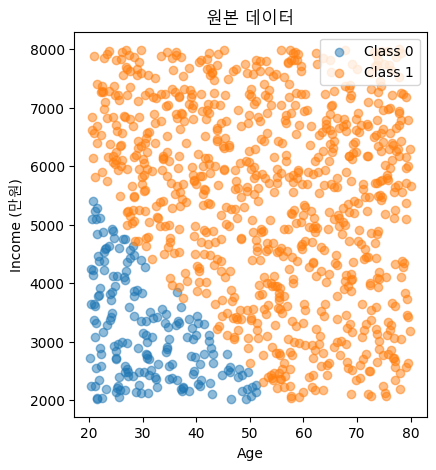

In [21]:
# 데이터 시각화 (정규화 전/후 비교)
plt.figure(figsize=(10, 5))

# 원본 데이터 시각화
plt.subplot(1, 2, 1)
plt.scatter(age[y==0], income[y==0], alpha=0.5, label='Class 0')
plt.scatter(age[y==1], income[y==1], alpha=0.5, label='Class 1')
plt.xlabel('Age')
plt.ylabel('Income (만원)')
plt.title('원본 데이터')
plt.legend()
plt.show()

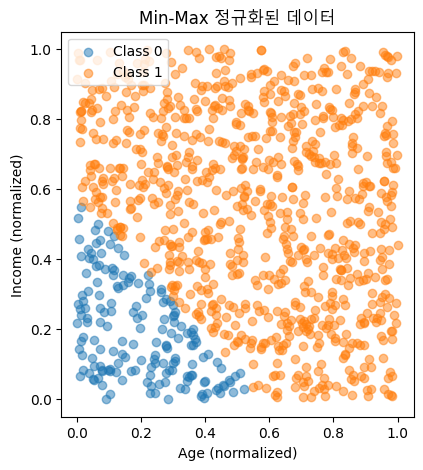

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Min-Max Scaler 함수
def min_max_scaler(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    X_scaled = (X - X_min) / (X_max - X_min)
    return X_scaled

# 샘플 데이터 생성
n_samples = 1000
age = np.random.uniform(20, 80, n_samples)
income = np.random.uniform(2000, 8000, n_samples)
X = np.column_stack([age, income])
y = (age/50 + income/5000 > 1.5).astype(int)

# Min-Max Scaling 적용
X_scaled = min_max_scaler(X)

# 정규화된 데이터 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[y==0, 0], X_scaled[y==0, 1], alpha=0.5, label='Class 0')
plt.scatter(X_scaled[y==1, 0], X_scaled[y==1, 1], alpha=0.5, label='Class 1')
plt.xlabel('Age (normalized)')
plt.ylabel('Income (normalized)')
plt.title('Min-Max 정규화된 데이터')
plt.legend()
plt.show()

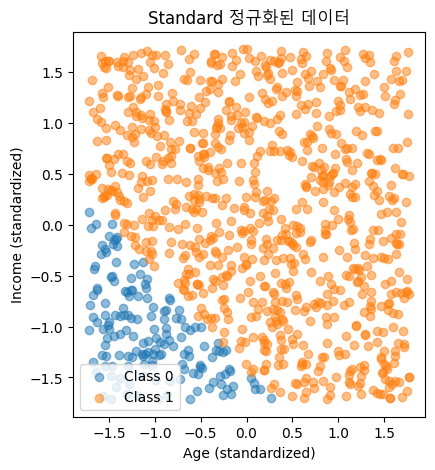

In [26]:
import numpy as np

# Standard Scaler 함수
def standard_scaler(X):
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    X_scaled = (X - X_mean) / X_std
    return X_scaled

# 샘플 데이터
n_samples = 1000
age = np.random.uniform(20, 80, n_samples)
income = np.random.uniform(2000, 8000, n_samples)
X = np.column_stack([age, income])
y = (age/50 + income/5000 > 1.5).astype(int)

# Standard Scaling 적용
X_standard_scaled = standard_scaler(X)

# 정규화된 데이터 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_standard_scaled[y==0, 0], X_standard_scaled[y==0, 1], alpha=0.5, label='Class 0')
plt.scatter(X_standard_scaled[y==1, 0], X_standard_scaled[y==1, 1], alpha=0.5, label='Class 1')
plt.xlabel('Age (standardized)')
plt.ylabel('Income (standardized)')
plt.title('Standard 정규화된 데이터')
plt.legend()
plt.show()

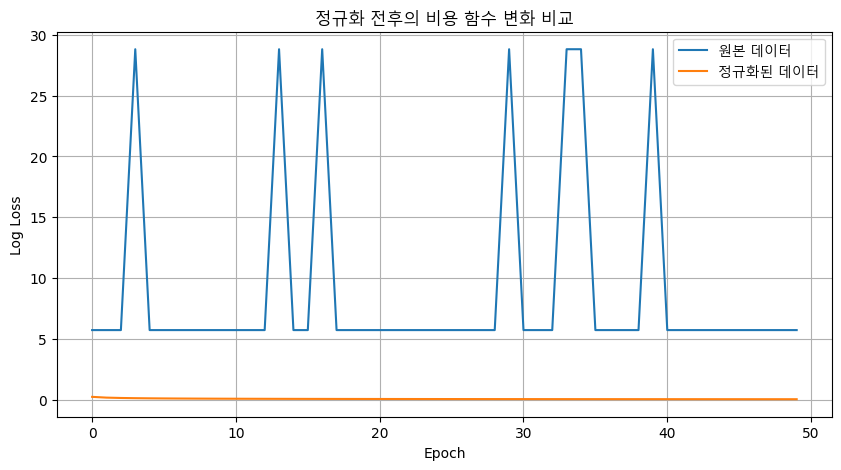

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

# Standard Scaler 함수
def standard_scaler(X):
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    X_scaled = (X - X_mean) / X_std
    return X_scaled

# 샘플 데이터 생성
n_samples = 1000
age = np.random.uniform(20, 80, n_samples)
income = np.random.uniform(2000, 8000, n_samples)
X = np.column_stack([age, income])
y = (age/50 + income/5000 > 1.5).astype(int)

# Standard Scaling 적용
X_standard_scaled = standard_scaler(X)

# 비용 함수 변화를 추적하기 위한 함수
def track_loss(X, y, n_epochs=50):
    clf = SGDClassifier(loss='log_loss', max_iter=1, learning_rate='constant', eta0=0.01)
    losses = []
    
    for _ in range(n_epochs):
        clf.partial_fit(X, y, classes=np.unique(y))
        y_pred_proba = clf.predict_proba(X)
        loss = log_loss(y, y_pred_proba)
        losses.append(loss)
    
    return losses

# 정규화 전후 비용 함수 변화 비교
loss_original = track_loss(X, y)
loss_standard_scaled = track_loss(X_standard_scaled, y)

# 비용 함수 변화 시각화
plt.figure(figsize=(10, 5))
plt.plot(loss_original, label='원본 데이터')
plt.plot(loss_standard_scaled, label='정규화된 데이터')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('정규화 전후의 비용 함수 변화 비교')
plt.legend()
plt.grid(True)
plt.show()

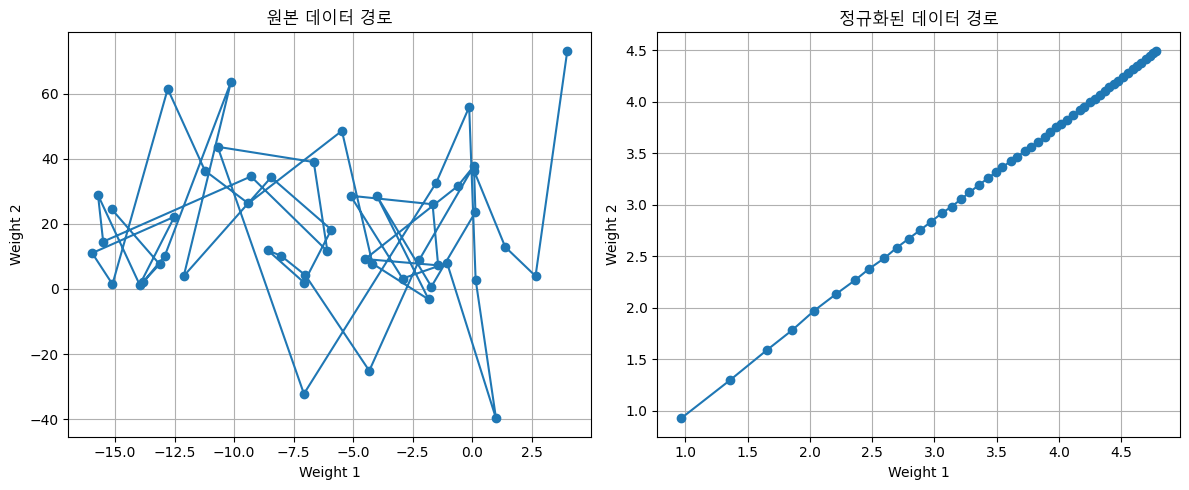

In [32]:

# 경사하강법 경로 추적 함수
def plot_sgd_path(X, y, title):
    clf = SGDClassifier(loss='log_loss', max_iter=1, learning_rate='constant', eta0=0.01)
    weights = []
    
    for _ in range(50):
        clf.partial_fit(X, y, classes=np.unique(y))
        weights.append(clf.coef_.copy())
    
    weights = np.array(weights).squeeze()
    
    plt.plot(weights[:, 0], weights[:, 1], marker='o')
    plt.title(title)
    plt.xlabel('Weight 1')
    plt.ylabel('Weight 2')
    plt.grid(True)

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_sgd_path(X, y, '원본 데이터 경로')

plt.subplot(1, 2, 2)
plot_sgd_path(X_standard_scaled, y, '정규화된 데이터 경로')

plt.tight_layout()
plt.show()